# Álgebra Lineal - Perceptrón

## Introducción

Las redes neuronales son modelos computacionales cuyo objetivo se centra en replicar métodos de procesamiento de información análogos a los que se encuentran en las neuronas del cerebro.

Una red neuronal es una colección de neuronas interconectadas que aprenden incrementalmente de su entorno, es decir, los datos provistos, para capturar tendencias lineales y no lineales en datos complejos, de modo que proporciona predicciones confiables para situaciones nuevas incluso cuando se tiene ruido o información parcial[1].

Desde el punto de vista computacional, el cerebro está formado por elementos de procesamiento de información denominados neuronas. Las neuronas están formadas por tres elementos esenciales:

1. Las dendritas cuya función es recibir los pulsos eléctricos emitidos desde otras neuronas.
2. El cuerpo de la neurona, en donde se encuentra el núcleo, que recibe los pulsos y los transforma. 
3. Una vez procesados los pulsos, estos son emitidos hacia otras neuronas a través del axón.

<center>
    <img src="Neurona_tagged.png" width="600">

**Fig. 1:** Esquema de los componentes principales de una neurona.
</center>

El modelo del Perceptrón propuesto por McCuloch & Pitss[2] () fue el primer modelo matemático de estos sistemas. Este modelo incluye:
1. Una capa de entrada que incluye los valores de las diferentes variables ($x_0, x_1 \dotsc, x_n$). Cada uno de estos valores poseen factores de peso ($w_i$). La variable $x_0$ es denominada *bias* (sesgo) y usualmente posee el valor de 1. La representación matemática de las variables de entrada $x$ y los factores de peso $w$ son matriciales:


$$ x = \begin{bmatrix}
           x_{1} \\
           x_{2} \\
           \vdots \\
           x_{n}
         \end{bmatrix}
$$
 
$$ w = \begin{bmatrix}
           w_{1} \\
           w_{2} \\
           \vdots \\
           w_{n}
         \end{bmatrix}
$$




2. La siguiente capa se encarga de aplicar una función suma ($\sum$) que contempla la adición de las diferentes entradas con sus respectivos factores de peso ($x_i\cdot w_i$). Esto es análogo al cálculo de una señal de entrada total en la neurona. La función de suma usualmente posee la siguiente forma:

$$ u = \sum_n w_i * x_i $$

<!---$$ u = w^T \cdot x $$ -->

3. La capa de salida contempla aplicar una función de activación (f) para transforma el resultado de la función suma en un valor de salida determinado. Por ejemplo, en 0 y 1 en caso de desear un clasificador binario. 

$$ y = \begin{bmatrix}
           y_{1} \\
           y_{2} \\
           \vdots \\
           y_{n}
         \end{bmatrix}
$$

$$y = f(u) $$
<center>
    <img src="NeuralNetwork.png" width="600">
**Fig. 1:** Modelo de una Red Neuronal Artificial.
</center>

## A. Perceptrón como una Compuerta Lógica

Un ejercicio introductorio a la redes neuronales consiste en la selección de los factores de pesos adecuados para la creación de compuertas lógicas. La compuerta lógica **OR** posee la siguiente tabla de verdad. 



| $x_1$ | $x_2$   | y |
| ------ |---------| ------:|
| 0  | 0  | 0  |
| 0  | 1  | 1  |
| 1  | 0  | 1  |
| 1  | 1  | 1  |

<center>
    Tabla 1. Tabla de verdad **OR**
</center>


(1) Crear una matriz $x_{or}$ con los 4 casos posibles de la compuerta **OR**.

In [1]:
#Importación de bibliotecas
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#(1) Crea la tabla aquí
x_or = np.array([[0,0],[0,1],[1,0],[1,1]])
print(x_or)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]


(2) Añadir el *bias* en cada elemento.

In [3]:
#(2) Añadir bias aquí
x_or = np.insert(x_or, 0, 1, axis=1)
print(x_or)

[[1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]


(3) Crear la tabla de factores de peso. Por ahora, consideremos $w = [1,2,3]$.

In [4]:
#(3) Crear tabla de factores aquí
w_or = np.array([1,2,3])
print(w_or)

[1 2 3]


(4) Consideremos ahora el elemento $x[1]$, es decir cuando $x_1 = 0$ y $x_2 = 1$. Aplica la función suma y almacena la respuesta en una variable *u_or*. No olvides de vectorizar las operaciones.

In [5]:
# (4) Aplicar función suma aquí.
u_or = x_or[1].dot(w_or)
print(u_or)

4


(5) La función de activación a emplear será la función sigmoide. Esta función es ampliamente en los modelos de clasficación binaria. 

$$ f(x) = \frac{1}{1+e^{-z}}$$

Completa la definición de la función sigmoide que se proporciona a continuación. Aplícala a la variable *u_or* anteriormente definida.

In [6]:
#Completar la definición de la función sigmoide

def sigmoid(x):
    return 1 / (1+np.exp(-x)) #Incluir aquí el código de la función sigmoide.

#Aplica la función sobre u_or
print(sigmoid(u_or))

0.982013790038


(5) Grafica la función sigmoide para observar su comportamiento en el intervalo (-20,20).

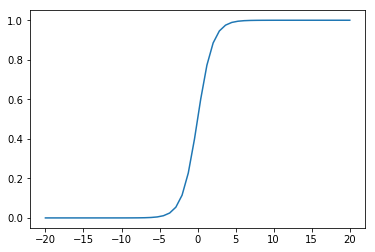

In [7]:
#Grafiar la función sigmoide 
x_sigmoid = np.linspace(-20,20,50)
plt.plot(x_sigmoid, sigmoid(x_sigmoid),'-')

(6) A continuación automatizaremos todo los pasos anteriores en una sola función para poder calcular de manera más fácil el resultado de la compuerta lógica. Completa la función descrita a continuación.

In [10]:
#Completar la función lg_or
#Recorrer con producto cartesiano las posibles w
def lg_or(x, w):
    #Completar el procedimiento aquí
    #w_or = np.array([1,2,3])
    
    u_or = x.dot(w)
    
    return sigmoid(u_or)

print(lg_or(x_or))

[ 0.73105858  0.98201379  0.95257413  0.99752738]


(7) Modifica la función anterior, en específico la matriz de factores de peso para que funcione adecuadamente como una compuerta **OR**. 

In [11]:
print(lg_or(x_or))

[ 0.73105858  0.98201379  0.95257413  0.99752738]


(8) Define las funciones para las compuertas lógicas **NOT** y **AND**, los cuales siguen las siguientes tablas de verdad:

| $x_1$ | $y$   |
| ------ | ------:|
| 0  | 1  |
| 1  | 0  |
<center>
    Tabla 1. Tabla de verdad **NOT**
</center>

| $x_1$ | $x_2$   | y |
| ------ |---------| ------:|
| 0  | 0  | 1  |
| 0  | 1  | 0  |
| 1  | 0  | 0  |
| 1  | 1  | 1  |

<center>
    Tabla 1. Tabla de verdad **AND**
</center>

Prueba los valores de las funciones definidas con las tablas de entrada de cada uno.


In [ ]:
# Definir la compuerta OR

def lg_not(x):
    # Completar el procedimiento aquí
    return 

# Crear la tabla de entrada (no olvidar el bias)


# Probar con los valores de la tabla de entrada.

In [ ]:
# Definir la compuerta and

def lg_and(x):
    # Completar el procedimiento aquí
    return 

# Crear la tabla de entrada (no olvidar el bias)


# Probar con los valores de la tabla de entrada.